In [92]:
import io
import requests
from PIL import Image
import torch
import numpy
from datasets import load_dataset
import timm
from torchvision.transforms import PILToTensor, ToPILImage
from IPython.display import display

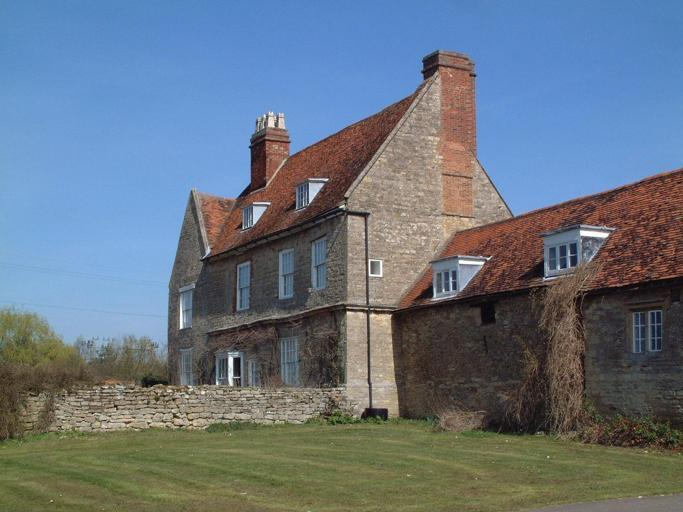

In [2]:
ds = load_dataset("hf-internal-testing/fixtures_ade20k", split="test")
img = Image.open(ds[0]['file'])
# image = Image.open(ds[0]['file']).resize((256,256))
img

In [3]:
model = timm.create_model(
    "hf_hub:timm/vit_giant_patch14_reg4_dinov2.lvd142m",
    pretrained=True,
    num_classes=0,  # remove classifier nn.Linear
)
model = model.eval()

In [4]:
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)
output = model.forward_features(transforms(img).unsqueeze(0))

In [11]:
output.shape

torch.Size([1, 1374, 1536])

In [117]:
z = (output - output.mean())/output.std()
z = z.clamp(-3,3)
z = z/6 + 0.5
z = (255*z).to(torch.uint8)
z1 = z[:,:,:19]
z2 = z[:,:,19:][0]
z3 = z2.permute(1,0).reshape(1374,41,37)

In [130]:
img = ToPILImage()(z3[0,:,:])
img.width

37

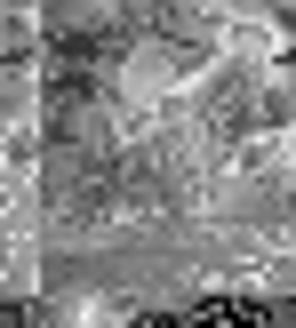

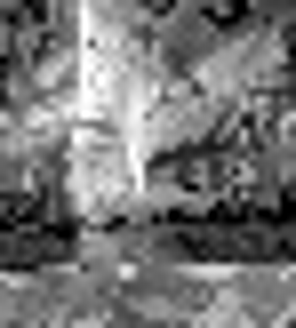

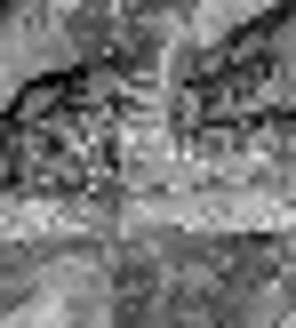

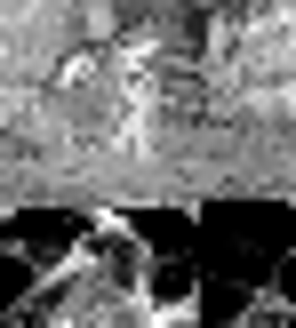

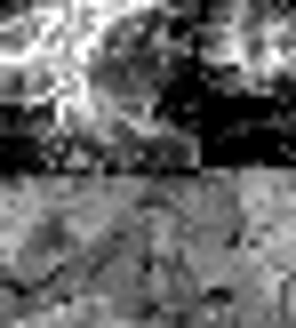

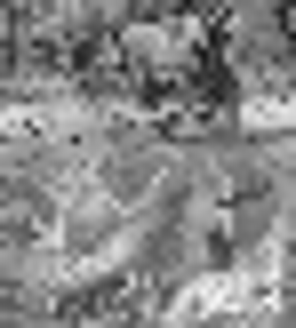

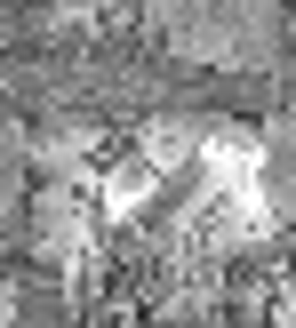

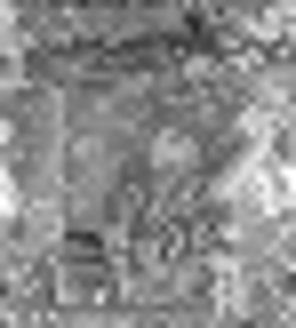

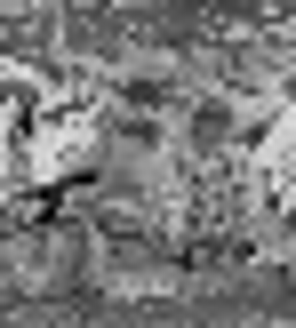

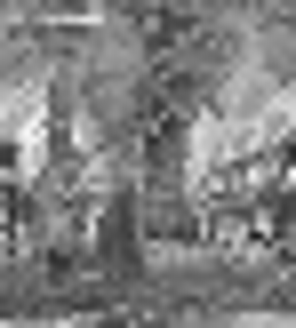

In [132]:
for channel in range(10):
    display(ToPILImage()(z3[channel,:,:]).resize((37*8,41*8)))